In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/confidence-adventurousness-dominance/AS+SC+AD+DO/codebook.txt
/kaggle/input/confidence-adventurousness-dominance/AS+SC+AD+DO/data.csv


## DISC Personality matchmaking with Multi-armed Bandits (MAB)
![thumb](https://i.ibb.co.com/5WZKd1b/Group-1.png)  
Hi, am Riveong q(≧▽≦q)  
I want to make Recommendation system / Matchmaking with Multi-armed bandits.  
the focus of this experiment / study (because it's my thesis) is to test and compare between 3 

## Data Overview

In [2]:
datas = pd.read_csv('/kaggle/input/confidence-adventurousness-dominance/AS+SC+AD+DO/data.csv')
datas.head()

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
0,4,4,3,3,5,4,1,3,1,1,...,3,1,3,2,5,4,2,1,29,2
1,4,3,4,4,3,2,3,3,4,3,...,3,2,3,2,3,3,2,2,49,2
2,5,4,4,5,3,3,2,2,1,1,...,3,3,3,4,4,5,2,3,52,1
3,4,3,3,2,3,3,4,3,4,1,...,3,3,4,4,4,5,3,1,34,2
4,4,4,4,4,4,3,2,1,2,0,...,4,3,4,3,5,5,4,4,52,2


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AS1     1005 non-null   int64
 1   AS2     1005 non-null   int64
 2   AS3     1005 non-null   int64
 3   AS4     1005 non-null   int64
 4   AS5     1005 non-null   int64
 5   AS6     1005 non-null   int64
 6   AS7     1005 non-null   int64
 7   AS8     1005 non-null   int64
 8   AS9     1005 non-null   int64
 9   AS10    1005 non-null   int64
 10  SC1     1005 non-null   int64
 11  SC2     1005 non-null   int64
 12  SC3     1005 non-null   int64
 13  SC4     1005 non-null   int64
 14  SC5     1005 non-null   int64
 15  SC6     1005 non-null   int64
 16  SC7     1005 non-null   int64
 17  SC8     1005 non-null   int64
 18  SC9     1005 non-null   int64
 19  SC10    1005 non-null   int64
 20  AD1     1005 non-null   int64
 21  AD2     1005 non-null   int64
 22  AD3     1005 non-null   int64
 23  AD4     1005 

# Cleaning Data

In [4]:
datas = datas.replace(0, pd.NA)
datas = datas.dropna()

In [5]:
datas.tail()

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
999,3,2,2,3,2,3,3,3,3,2,...,3,2,2,3,3,3,2,2,60,1
1000,2,5,4,4,3,5,1,3,2,3,...,4,3,4,3,3,5,4,1,15,2
1001,4,4,3,3,4,4,2,2,1,1,...,2,2,2,2,2,4,2,2,38,2
1002,4,4,4,4,4,3,2,4,2,1,...,2,2,4,4,2,4,3,4,34,2
1003,5,4,3,5,4,4,1,2,1,1,...,3,3,3,3,4,4,4,4,23,1


In [6]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898 entries, 1 to 1003
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AS1     898 non-null    object
 1   AS2     898 non-null    object
 2   AS3     898 non-null    object
 3   AS4     898 non-null    object
 4   AS5     898 non-null    object
 5   AS6     898 non-null    object
 6   AS7     898 non-null    object
 7   AS8     898 non-null    object
 8   AS9     898 non-null    object
 9   AS10    898 non-null    object
 10  SC1     898 non-null    object
 11  SC2     898 non-null    object
 12  SC3     898 non-null    object
 13  SC4     898 non-null    object
 14  SC5     898 non-null    object
 15  SC6     898 non-null    object
 16  SC7     898 non-null    object
 17  SC8     898 non-null    object
 18  SC9     898 non-null    object
 19  SC10    898 non-null    object
 20  AD1     898 non-null    object
 21  AD2     898 non-null    object
 22  AD3     898 non-null    object

# Making random sample data

In [7]:
# picking 10% of df
sampled_data = datas.sample(frac=0.1, random_state=1)

# saving data
sampled_data.to_csv('sampled_data.csv', index=False)

In [8]:
data2 = pd.read_csv('/kaggle/working/sampled_data.csv')
data2

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
0,5,4,4,4,4,4,2,2,2,1,...,2,2,4,2,2,2,2,2,51,2
1,2,2,2,2,2,2,4,4,4,2,...,2,2,2,2,2,2,2,2,31,1
2,5,3,4,4,4,4,2,3,2,1,...,2,1,3,3,5,3,1,2,60,2
3,4,4,3,3,4,3,4,2,3,1,...,3,3,3,3,2,2,2,2,42,2
4,2,3,2,2,2,3,3,2,2,4,...,4,3,5,3,3,3,4,3,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4,4,2,4,2,3,4,4,2,1,...,4,1,1,1,1,1,1,1,56,2
86,2,4,2,5,3,4,3,3,1,1,...,4,4,4,4,3,5,3,4,27,1
87,2,5,4,4,2,4,1,3,1,1,...,4,4,5,2,4,5,2,4,31,1
88,4,3,4,4,3,4,3,2,2,2,...,3,3,3,3,3,3,3,2,47,2


#### Visualization
--Can Ignore--

In [9]:
#for column in datas.columns:
#    plt.figure(figsize=(5, 3))
#    sns.histplot(data=datas, x=column, kde=True)
#    plt.title(f'Distribution of {column}')
#    plt.show()

# Standart Scaler + PCA

first data

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# drop the 'age' and 'gender' columns

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(datas)
df_scaled = scaler.transform(datas)

# Apply PCA
pca = PCA(n_components=2)  # change n_components to the number of dimensions you want
principalComponents = pca.fit_transform(df_scaled)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['x', 'y'])

principalDf

,x,y
0,2.707580,0.915903
1,-2.907233,-0.302782
2,2.499083,0.725821
3,3.127694,4.411626
4,0.402050,-1.864485
...,...,...
893,4.984859,0.254260
894,0.106854,1.615690
895,-0.373545,-3.135757
896,-0.006650,0.752133


second data

In [11]:
# Assuming df is your DataFrame
# Standardize the features to have mean=0 and variance=1
scaler2 = StandardScaler().fit(data2)
df_scaled2 = scaler.transform(data2)

# Apply PCA
pca = PCA(n_components=2)  # change n_components to the number of dimensions you want
principalComponents = pca.fit_transform(df_scaled2)

# Convert to DataFrame
principalDf2 = pd.DataFrame(data=principalComponents, columns=['x', 'y'])

principalDf2

,x,y
0,-0.494838,-2.065276
1,7.484281,0.109833
2,0.580334,-1.096536
3,2.034679,-0.048849
4,3.636375,3.197271
...,...,...
85,2.192321,-3.502159
86,1.134049,5.194153
87,0.892150,3.044867
88,-0.614401,-0.872903


# plot scatter

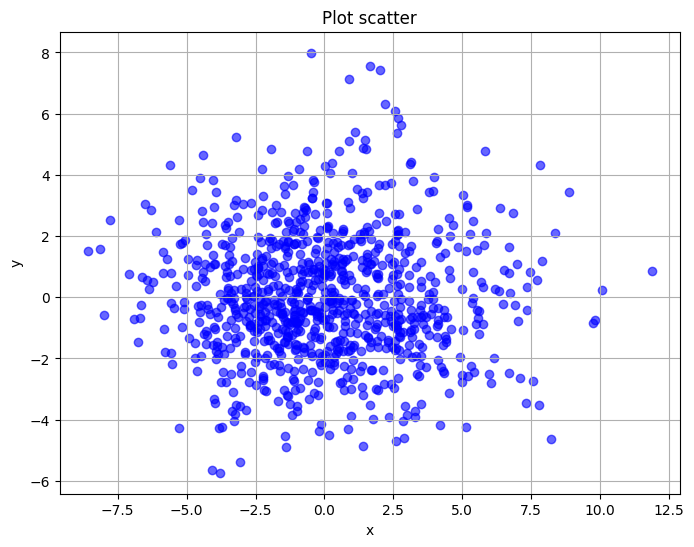

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x=principalDf['x'], y=principalDf['y'], alpha=0.6, color='b', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot scatter')
plt.grid(True)
plt.show()

# Cosine Similarity Between Each Others

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(principalDf)
similarity_df = pd.DataFrame(similarity_matrix, index=principalDf.index, columns=principalDf.index)
melted_df = similarity_df.reset_index().melt(id_vars='index', var_name='match_id', value_name='similarity_score')
melted_df = melted_df.rename(columns={'index': 'user_id'})

# binary
threshold = 0.5
melted_df['response'] = (melted_df['similarity_score'] >= threshold).astype(int)
print(melted_df[['user_id', 'match_id', 'response']])
melted_df.to_csv('preprocessed_data.csv')

        user_id match_id  response
0             0        0         1
1             1        0         0
2             2        0         1
3             3        0         1
4             4        0         0
...         ...      ...       ...
806399      893      897         0
806400      894      897         0
806401      895      897         0
806402      896      897         0
806403      897      897         1

[806404 rows x 3 columns]


In [14]:
similarity_matrix2 = cosine_similarity(principalDf2)
similarity_df2 = pd.DataFrame(similarity_matrix2, index=principalDf2.index, columns=principalDf2.index)
melted_df2 = similarity_df2.reset_index().melt(id_vars='index', var_name='match_id', value_name='similarity_score')
melted_df2 = melted_df2.rename(columns={'index': 'user_id'})

# binary
threshold = 0.5
melted_df2['response'] = (melted_df2['similarity_score'] >= threshold).astype(int)
print(melted_df2[['user_id', 'match_id', 'response']])
melted_df2.to_csv('preprocessed_data2.csv')

      user_id match_id  response
0           0        0         1
1           1        0         0
2           2        0         1
3           3        0         0
4           4        0         0
...       ...      ...       ...
8095       85       89         0
8096       86       89         0
8097       87       89         0
8098       88       89         1
8099       89       89         1

[8100 rows x 3 columns]


In [15]:
predf = pd.read_csv('/kaggle/working/preprocessed_data.csv')
predf

,Unnamed: 0,user_id,match_id,similarity_score,response
0,0,0,0,1.000000,1
1,1,1,0,-0.975367,0
2,2,2,0,0.999053,1
3,3,3,0,0.809270,1
4,4,4,0,-0.113561,0
...,...,...,...,...,...
806399,806399,893,897,-0.997717,0
806400,806400,894,897,-0.183544,0
806401,806401,895,897,0.234902,0
806402,806402,896,897,-0.109490,0


In [16]:
predf2 = pd.read_csv('/kaggle/working/preprocessed_data2.csv')
predf2

,Unnamed: 0,user_id,match_id,similarity_score,response
0,0,0,0,1.000000,1
1,1,1,0,-0.247249,0
2,2,2,0,0.750529,1
3,3,3,0,-0.209596,0
4,4,4,0,-0.817119,0
...,...,...,...,...,...
8095,8095,85,89,-0.562648,0
8096,8096,86,89,-0.175767,0
8097,8097,87,89,-0.244253,0
8098,8098,88,89,0.543867,1


# Recommender
Learning Policy:

- Greedy (epsilon)
- Linear Greedy
- Linear Greedy (with epsilon)
- Thompson Sampling  
Usage Guide:  
num arm = num of items  
num rounds = num of iteration  

In [17]:
data = predf # dataframe
num_arms = 100 # Number of matches
epsilon = 0.5  # Exploration rate
num_rounds = 1000  # Number of rounds to simulate

## Epsilon Greedy

In [18]:
def epsilon_greedy_bandit(dataset, num_arms, epsilon, num_rounds):
    estimated_rewards = [0] * num_arms
    num_selected = [0] * num_arms
    total_rewards = 0
    exploration_count = 0
    exploitation_count = 0

    for _ in range(num_rounds):
        if random.random() < epsilon:
            # Explore: Choose a random arm
            chosen_arm = random.randint(0, num_arms - 1)
            exploration_count += 1
        else:
            # Exploit: Choose the arm with the highest estimated reward
            chosen_arm = max(range(num_arms), key=lambda arm: estimated_rewards[arm])
            exploitation_count += 1

        # Randomly select an observation for the chosen arm from the dataset
        chosen_row = dataset[dataset['match_id'] == chosen_arm].sample(n=1)
        
        # Observe the reward (response) for the chosen arm
        reward = chosen_row['response'].values[0]
        total_rewards += reward

        # Update the estimated reward for the chosen arm
        num_selected[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / num_selected[chosen_arm]

    return estimated_rewards, num_selected, exploration_count, exploitation_count, total_rewards


In [19]:
def run_multiple_experiments(data, num_arms, epsilon, num_rounds, num_experiments):
    total_rewards_array = []

    for _ in range(num_experiments):
        results = epsilon_greedy_bandit(data, num_arms, epsilon, num_rounds)
        total_rewards_array.append(results[4])

    mean_total_rewards = np.mean(total_rewards_array)
    return mean_total_rewards, total_rewards_array

**usage**

In [20]:
results = epsilon_greedy_bandit(data, num_arms, epsilon, num_rounds)
print("Estimated rewards for each arm:", results[0])
print("Number of times each arm was selected:", results[1])
print("Exploration count:", results[2])
print("Exploitation count:", results[3])
print("Total rewards:", results[4])

Estimated rewards for each arm: [0.3571428571428571, 0.16666666666666669, 0.25000000000000006, 0.33333333333333337, 0.48148148148148157, 0.4, 0.0, 0.3333333333333333, 0.4736842105263158, 0.39999999999999997, 0.45454545454545453, 0.25000000000000006, 0.4874999999999999, 0.2, 0.16666666666666669, 0.4117647058823529, 0.3, 0.3, 0.25, 0.28571428571428575, 0.0, 0.25, 0.22222222222222227, 0.25, 0.3125, 0.0, 0.0, 0.375, 0.0, 0.0, 0.45833333333333337, 0.0, 0.0, 0.4444444444444444, 0.14285714285714288, 0.4444444444444444, 0.4285714285714286, 0.45000000000000007, 0.33333333333333337, 0.47169811320754723, 0.0, 0.10000000000000002, 0.39999999999999997, 0.14285714285714288, 0.16666666666666669, 0.0, 0.3333333333333333, 0.33333333333333337, 0.4444444444444444, 0.25, 0.28571428571428575, 0.36363636363636365, 0.0, 0.2, 0.33333333333333337, 0.25, 0.25, 0.25, 0.41666666666666663, 0.41666666666666663, 0.14285714285714288, 0.25, 0.2857142857142857, 0.33333333333333337, 0.45, 0.0, 0.3333333333333333, 0.0, 0

## Thompson Sampling

In [21]:
def thompson_sampling_bandit(dataset, num_arms, num_rounds):
    # Parameters for the Beta distribution of each arm: successes (alpha) and failures (beta)
    alpha = np.ones(num_arms)
    beta = np.ones(num_arms)
    
    total_rewards = 0

    # Iterate through the specified number of rounds
    for _ in range(num_rounds):
        # Sample from the Beta distribution for each arm
        theta = [np.random.beta(alpha[i] + 1, beta[i] + 1) for i in range(num_arms)]
        
        # Choose the arm with the highest sampled probability
        chosen_arm = np.argmax(theta)

        # Randomly select an observation for the chosen arm from the dataset
        # Here, filtering dataset where 'match_id' equals chosen_arm and sampling one row
        chosen_row = dataset[dataset['match_id'] == chosen_arm].sample(n=1)
        
        # Observe the reward (response) for the chosen arm
        reward = chosen_row['response'].values[0]
        total_rewards += reward
        
        # Update the alpha and beta for the chosen arm based on the reward
        if reward > 0:
            alpha[chosen_arm] += 1
        else:
            beta[chosen_arm] += 1

    return alpha, beta, total_rewards

In [22]:
def run_thompson_sampling_experiments(data, num_arms, num_rounds, num_experiments):
    total_rewards_array = []

    for _ in range(num_experiments):
        results = thompson_sampling_bandit(data, num_arms, num_rounds)
        total_rewards_array.append(results[2])

    mean_total_rewards = np.mean(total_rewards_array)
    return mean_total_rewards, total_rewards_array

In [23]:
results = thompson_sampling_bandit(data, num_arms, num_rounds)
print("Updated alpha and beta parameters:", results[0:2])
print("Total rewards accumulated:", results[2])

Updated alpha and beta parameters: (array([ 5.,  9.,  1.,  4.,  1.,  5.,  2.,  6.,  4.,  3.,  2.,  2.,  4.,
        4.,  8.,  5.,  4.,  6.,  2.,  9., 11.,  2.,  1.,  4.,  1.,  1.,
        8.,  6.,  4.,  5.,  1.,  5.,  4., 13.,  3.,  1.,  2.,  1.,  2.,
        3.,  1.,  3., 10.,  2.,  3., 11.,  2.,  3., 12.,  6., 13.,  2.,
        3.,  7.,  7.,  4., 13.,  2.,  1., 10.,  3.,  1.,  2.,  1.,  9.,
        4., 11.,  9., 10.,  7.,  4.,  7.,  3., 14.,  1.,  2.,  4.,  6.,
        4.,  1.,  7.,  2.,  2.,  1.,  6.,  1.,  6.,  8.,  8.,  2.,  3.,
        1.,  2.,  1.,  3.,  5.,  1.,  2.,  7.,  1.]), array([ 9.,  9.,  5.,  6.,  6.,  9.,  5., 10.,  6.,  7.,  5.,  6.,  6.,
        9., 10.,  7.,  7.,  7.,  6., 10., 11.,  6.,  4.,  8.,  6.,  6.,
       10.,  8.,  8.,  9.,  7.,  7.,  8., 12.,  6.,  5.,  6.,  5.,  7.,
        5.,  6.,  7., 10.,  6.,  6., 12.,  6.,  6., 11.,  7., 14.,  7.,
        7.,  8.,  9.,  7., 11.,  7.,  5., 13.,  7.,  4.,  5.,  5., 10.,
        8., 12., 11.,  9.,  9.,  7.,  7.,  7.,

## Linear Greedy

In [24]:
from sklearn.linear_model import LinearRegression

def linear_greedy_bandit_epsilon(dataset, num_arms, epsilon, num_rounds):
    model = LinearRegression()
    total_rewards = 0
    chosen_arms = []
    count_explore = 0
    count_exploit = 0
    
    # Initialize the dataset for training the model
    training_data = pd.DataFrame()
    for arm in range(num_arms):
        arm_data = dataset[dataset['match_id'] == arm]
        if not arm_data.empty:
            training_data = pd.concat([training_data, arm_data.iloc[:1]], ignore_index=True)

    # Training the model on initial data if available
    if not training_data.empty:
        model.fit(training_data[['similarity_score']], training_data['response'])

        for _ in range(num_rounds):
            # Exploration vs. Exploitation
            if random.random() < epsilon:
                # Explore: Randomly select an arm
                chosen_arm_index = dataset.sample(n=1).index.item()
                count_explore += 1
            else:
                # Exploit: Select the arm with the highest predicted reward
                predictions = model.predict(dataset[['similarity_score']])
                dataset['predicted_reward'] = predictions
                max_indices = dataset.groupby('match_id')['predicted_reward'].idxmax()
                chosen_arm_index = dataset.loc[max_indices].sample(n=1).index.item()
                count_exploit += 1
            
            # Observe the reward and the chosen arm
            reward = dataset.at[chosen_arm_index, 'response']
            total_rewards += reward
            chosen_arm = dataset.at[chosen_arm_index, 'match_id']
            chosen_arms.append(chosen_arm)
            
            # Add this data point to the training dataset
            training_data = pd.concat([training_data, dataset.loc[chosen_arm_index:chosen_arm_index]], ignore_index=True)
            
            # Re-train the model with the updated training data
            model.fit(training_data[['similarity_score']], training_data['response'])

    # Calculate estimated total reward using the trained model
    predicted_rewards = model.predict(dataset[['similarity_score']])
    estimated_reward = np.mean(predicted_rewards) * num_rounds  # Scale by the number of rounds

    return chosen_arms, total_rewards, count_explore, count_exploit, estimated_reward

In [25]:
def run_linear_greedy_experiments(data, num_arms, epsilon, num_rounds, num_experiments):
    total_rewards_array = []

    for _ in range(num_experiments):
        results = linear_greedy_bandit_epsilon(data, num_arms, epsilon, num_rounds)
        total_rewards_array.append(results[1])  # Assuming results[1] is the total rewards accumulated

    mean_total_rewards = np.mean(total_rewards_array)
    return mean_total_rewards, total_rewards_array

In [26]:
results = linear_greedy_bandit_epsilon(data, num_arms,epsilon, num_rounds)
print("Chosen arms per round:", results[0])
print("Total rewards accumulated:", results[1])
print("Exploration Counts:", results[2])
print("Exploitation Counts:", results[3])
print("Estimated Rewards:", results[4])

Chosen arms per round: [646, 512, 832, 602, 9, 424, 693, 185, 642, 425, 39, 517, 752, 636, 39, 387, 319, 408, 327, 64, 321, 216, 670, 213, 208, 251, 731, 272, 825, 304, 8, 893, 130, 483, 44, 703, 32, 687, 648, 31, 371, 75, 833, 337, 480, 273, 740, 275, 358, 788, 465, 604, 790, 291, 308, 168, 84, 393, 83, 384, 77, 647, 5, 556, 292, 231, 698, 886, 853, 27, 691, 168, 431, 284, 627, 208, 802, 270, 585, 367, 566, 822, 873, 717, 491, 878, 758, 788, 763, 263, 315, 804, 511, 708, 90, 443, 73, 699, 442, 659, 599, 39, 702, 761, 479, 614, 42, 134, 319, 150, 817, 301, 270, 726, 510, 39, 313, 345, 205, 27, 469, 539, 460, 347, 866, 691, 694, 729, 399, 631, 2, 445, 291, 875, 333, 893, 555, 562, 202, 229, 438, 607, 844, 27, 792, 574, 400, 685, 57, 579, 405, 609, 148, 578, 772, 576, 687, 707, 589, 870, 41, 667, 525, 721, 259, 856, 873, 251, 22, 336, 691, 854, 405, 4, 267, 226, 563, 159, 741, 638, 5, 673, 761, 327, 335, 655, 716, 842, 242, 557, 255, 495, 316, 494, 867, 222, 469, 628, 410, 168, 575, 324,

# Simulation

## if all data included

In [27]:
data = predf # dataframe
num_arms = data['match_id'].nunique() # Number of matches
epsilon = 0.5  # Exploration rate
num_rounds = 10000  # Number of rounds to simulate
num_experiments = 10  # Number of times to run the bandit experiment

In [28]:
mean_rewards_eg = run_multiple_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_eg[0])

Mean of total rewards over all experiments: 3576.5


In [29]:
mean_rewards_ts = run_thompson_sampling_experiments(data, num_arms, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_ts[0])

Mean of total rewards over all experiments: 3546.9


In [30]:
mean_rewards_lints = run_linear_greedy_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_lints[0])

Mean of total rewards over all experiments: 6745.7


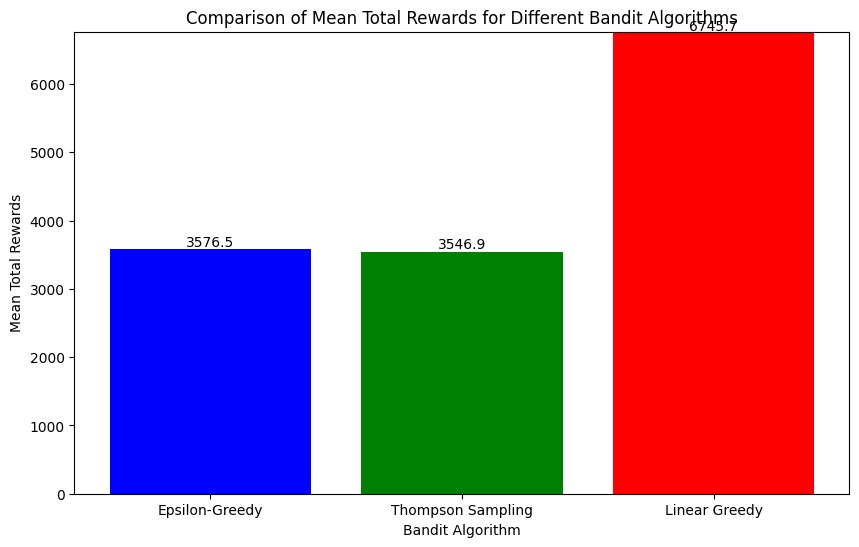

In [31]:
mean_rewards = [mean_rewards_eg[0], mean_rewards_ts[0], mean_rewards_lints[0]]
labels = ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_rewards, color=['blue', 'green', 'red'])
plt.xlabel('Bandit Algorithm')
plt.ylabel('Mean Total Rewards')
plt.title('Comparison of Mean Total Rewards for Different Bandit Algorithms')
plt.ylim(0, max(mean_rewards) + 20)  # Adjust y-axis limit for better visualization

# Adding value labels on top of the bars
for i in range(len(mean_rewards)):
    plt.text(i, mean_rewards[i] + 1, str(mean_rewards[i]), ha='center', va='bottom')

plt.show()

# if the all the data included but it's randomized

In [32]:
np.random.seed(42)
predf['response'] = np.random.choice([0, 1], size=len(predf))

In [33]:
mean_rewards_eg1 = run_multiple_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_eg1[0])

Mean of total rewards over all experiments: 5037.9


In [34]:
mean_rewards_ts1 = run_thompson_sampling_experiments(data, num_arms, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_ts1[0])

Mean of total rewards over all experiments: 4991.1


In [35]:
mean_rewards_lints1 = run_linear_greedy_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_lints1[0])

Mean of total rewards over all experiments: 4903.6


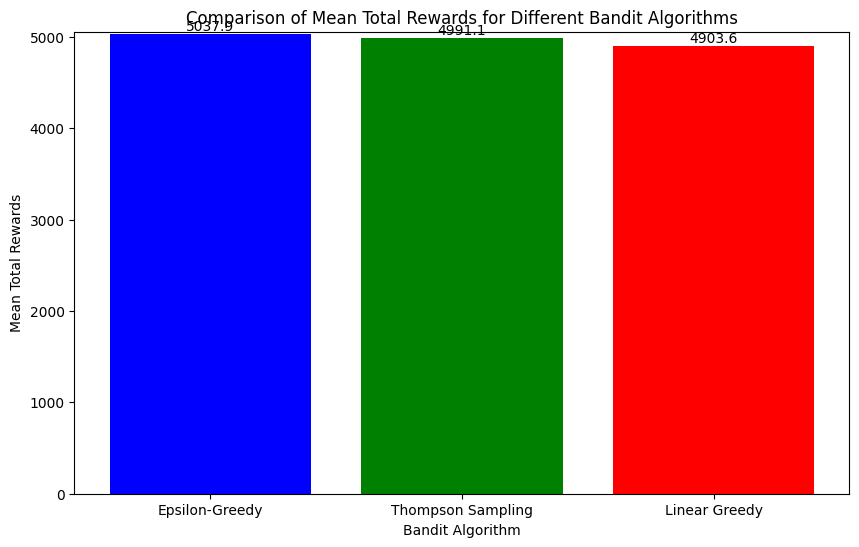

In [36]:
mean_rewards = [mean_rewards_eg1[0], mean_rewards_ts1[0], mean_rewards_lints1[0]]
labels = ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_rewards, color=['blue', 'green', 'red'])
plt.xlabel('Bandit Algorithm')
plt.ylabel('Mean Total Rewards')
plt.title('Comparison of Mean Total Rewards for Different Bandit Algorithms')
plt.ylim(0, max(mean_rewards) + 20)  # Adjust y-axis limit for better visualization

# Adding value labels on top of the bars
for i in range(len(mean_rewards)):
    plt.text(i, mean_rewards[i] + 1, str(mean_rewards[i]), ha='center', va='bottom')

plt.show()

# If Data is small (10% only)

In [37]:
data = predf2 # dataframe
num_arms = data['match_id'].nunique() # Number of matches
epsilon = 0.5  # Exploration rate
num_rounds = 10000  # Number of rounds to simulate

In [38]:
mean_rewards_eg2 = run_multiple_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_eg2[0])

Mean of total rewards over all experiments: 3800.0


In [39]:
mean_rewards_ts2 = run_thompson_sampling_experiments(data, num_arms, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_ts2[0])

Mean of total rewards over all experiments: 3748.1


In [40]:
mean_rewards_lints2 = run_linear_greedy_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_lints2[0])

Mean of total rewards over all experiments: 6737.4


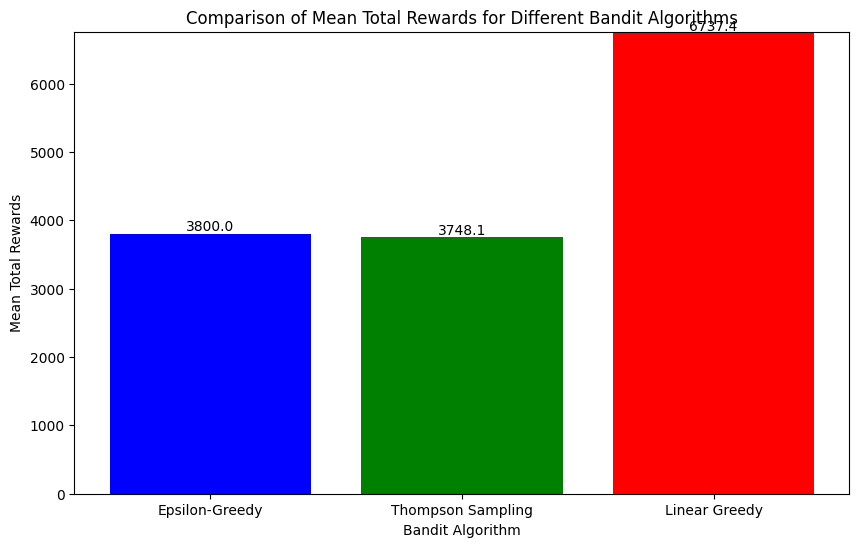

In [41]:
mean_rewards = [mean_rewards_eg2[0], mean_rewards_ts2[0], mean_rewards_lints2[0]]
labels = ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_rewards, color=['blue', 'green', 'red'])
plt.xlabel('Bandit Algorithm')
plt.ylabel('Mean Total Rewards')
plt.title('Comparison of Mean Total Rewards for Different Bandit Algorithms')
plt.ylim(0, max(mean_rewards) + 20)  # Adjust y-axis limit for better visualization

# Adding value labels on top of the bars
for i in range(len(mean_rewards)):
    plt.text(i, mean_rewards[i] + 1, str(mean_rewards[i]), ha='center', va='bottom')

plt.show()

# if the all the data small but it's randomized

In [42]:
np.random.seed(42)
predf2['response'] = np.random.choice([0, 1], size=len(predf2))

In [43]:
mean_rewards_eg3 = run_multiple_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_eg3[0])

Mean of total rewards over all experiments: 5559.6


In [44]:
mean_rewards_ts3 = run_thompson_sampling_experiments(data, num_arms, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_ts3[0])

Mean of total rewards over all experiments: 5572.0


In [45]:
mean_rewards_lints3 = run_linear_greedy_experiments(data, num_arms, epsilon, num_rounds, num_experiments)
print("Mean of total rewards over all experiments:", mean_rewards_lints3[0])

Mean of total rewards over all experiments: 5081.8


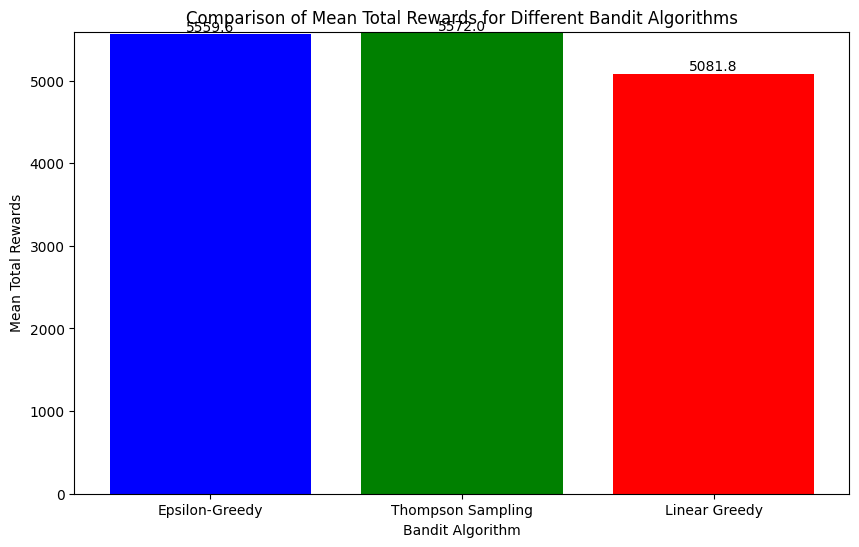

In [46]:
mean_rewards = [mean_rewards_eg3[0], mean_rewards_ts3[0], mean_rewards_lints3[0]]
labels = ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_rewards, color=['blue', 'green', 'red'])
plt.xlabel('Bandit Algorithm')
plt.ylabel('Mean Total Rewards')
plt.title('Comparison of Mean Total Rewards for Different Bandit Algorithms')
plt.ylim(0, max(mean_rewards) + 20)  # Adjust y-axis limit for better visualization

# Adding value labels on top of the bars
for i in range(len(mean_rewards)):
    plt.text(i, mean_rewards[i] + 1, str(mean_rewards[i]), ha='center', va='bottom')

plt.show()

# Mean Table + Conclusion

In [47]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg[1], mean_rewards_ts[1], mean_rewards_lints[1]]
}
df1 = pd.DataFrame(data)
df1

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,"[3558, 3585, 3466, 3602, 3626, 3601, 3547, 354..."
1,Thompson Sampling,"[3530, 3470, 3510, 3642, 3547, 3525, 3565, 357..."
2,Linear Greedy,"[6712, 6759, 6710, 6744, 6774, 6710, 6774, 675..."


In [48]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg[0], mean_rewards_ts[0], mean_rewards_lints[0]]
}
df11 = pd.DataFrame(data)
df11

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,3576.5
1,Thompson Sampling,3546.9
2,Linear Greedy,6745.7


In [49]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg1[1], mean_rewards_ts1[1], mean_rewards_lints1[1]]
}
df2 = pd.DataFrame(data)
df2

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,"[5036, 5059, 5085, 5036, 5055, 5080, 5012, 499..."
1,Thompson Sampling,"[5074, 5025, 4944, 4963, 5003, 5066, 5009, 495..."
2,Linear Greedy,"[4906, 4975, 4887, 4917, 4850, 4857, 4945, 490..."


In [50]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg1[0], mean_rewards_ts1[0], mean_rewards_lints1[0]]
}
df22 = pd.DataFrame(data)
df22

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,5037.9
1,Thompson Sampling,4991.1
2,Linear Greedy,4903.6


In [51]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg2[1], mean_rewards_ts2[1], mean_rewards_lints2[1]]
}
df3 = pd.DataFrame(data)
df3

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,"[3787, 3846, 3740, 3787, 3954, 3863, 3730, 377..."
1,Thompson Sampling,"[3759, 3703, 3726, 3772, 3750, 3672, 3788, 377..."
2,Linear Greedy,"[6735, 6818, 6753, 6603, 6690, 6774, 6683, 686..."


In [52]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg2[0], mean_rewards_ts2[0], mean_rewards_lints2[0]]
}
df33 = pd.DataFrame(data)
df33

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,3800.0
1,Thompson Sampling,3748.1
2,Linear Greedy,6737.4


In [53]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg3[1], mean_rewards_ts3[1], mean_rewards_lints3[1]]
}
df4 = pd.DataFrame(data)
df4

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,"[5599, 5523, 5614, 5548, 5514, 5475, 5706, 558..."
1,Thompson Sampling,"[5504, 5631, 5671, 5506, 5767, 5556, 5536, 536..."
2,Linear Greedy,"[5069, 5179, 5109, 5068, 5026, 5104, 5116, 499..."


In [54]:
data = {
    'Bandit Algorithm': ['Epsilon-Greedy', 'Thompson Sampling', 'Linear Greedy'],
    'Mean Total Rewards': [mean_rewards_eg3[0], mean_rewards_ts3[0], mean_rewards_lints3[0]]
}
df44 = pd.DataFrame(data)
df44

,Bandit Algorithm,Mean Total Rewards
0,Epsilon-Greedy,5559.6
1,Thompson Sampling,5572.0
2,Linear Greedy,5081.8
